In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# 1. Data Loading and Preprocessing
print("Loading CIFAR-10 dataset...")
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Class names for interpretation
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# 2. Data Visualization
def plot_sample_images():
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i])
        # The CIFAR labels happen to be arrays, which is why we need the index
        plt.xlabel(class_names[np.argmax(train_labels[i])])
    plt.tight_layout()
    plt.show()


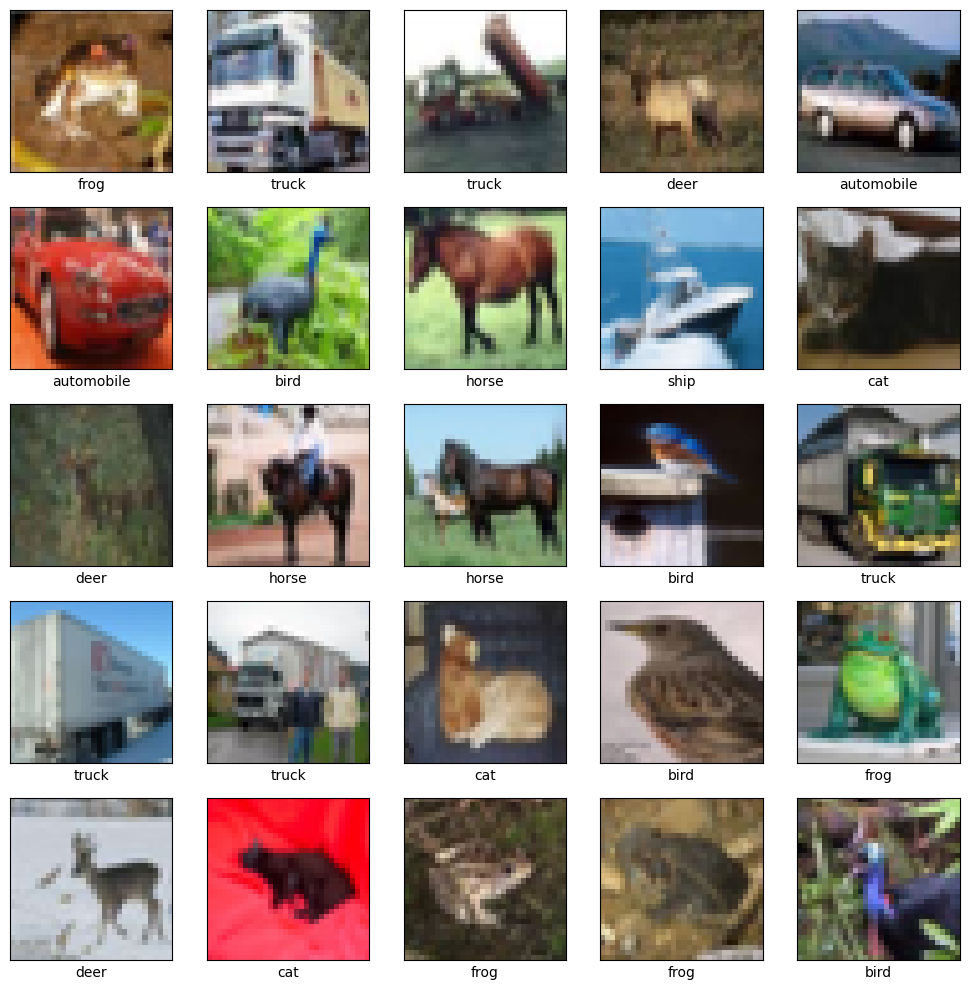

In [ ]:
# Uncomment to visualize sample images
plot_sample_images()

In [ ]:
# 3. Build CNN Model
def build_cnn_model():
    model = models.Sequential()

    # First Convolutional Block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    # Second Convolutional Block
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    # Third Convolutional Block
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    # Flatten and Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [ ]:
# 4. Create and compile the model
print("Building CNN model...")
model = build_cnn_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Building CNN model...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:
# 5. Define callbacks for training
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-5
)

In [ ]:
# 6. Train the model
print("Training the model...")
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

Training the model...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 378s 604ms/step - accuracy: 0.3809 - loss: 1.8457 - val_accuracy: 0.5343 - val_loss: 1.2966 - learning_rate: 0.0010
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 373s 596ms/step - accuracy: 0.5805 - loss: 1.1751 - val_accuracy: 0.6254 - val_loss: 1.0552 - learning_rate: 0.0010
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 382s 597ms/step - accuracy: 0.6546 - loss: 0.9742 - val_accuracy: 0.7225 - val_loss: 0.7879 - learning_rate: 0.0010
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 372s 580ms/step - accuracy: 0.6975 - loss: 0.8677 - val_accuracy: 0.7198 - val_loss: 0.7966 - learning_rate: 0.0010
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 386s 587ms/step - accuracy: 0.7238 - loss: 0.7853 - val_accuracy: 0.6936 - val_loss: 0.8526 - learning_rate: 0.0010
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 387s 594ms/step - accuracy: 0.7511 - loss: 0.7207 - val_accuracy: 0.7376 - val_loss: 0.7603 - learning_rate: 0.0010
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37

In [ ]:
# 7. Evaluate the model
print("Evaluating the model...")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


Evaluating the model...
313/313 - 28s - 91ms/step - accuracy: 0.8051 - loss: 0.5766

Test accuracy: 0.8051


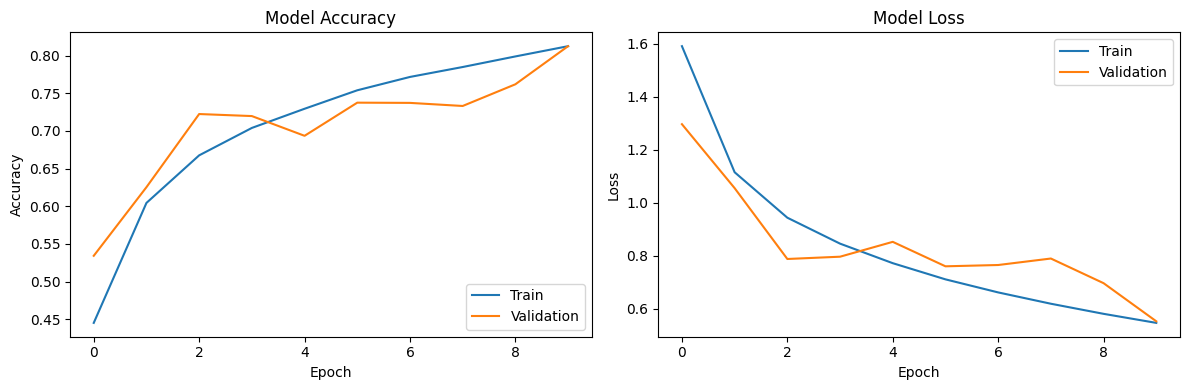

In [ ]:
# 8. Plot training history
def plot_training_history():
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.show()

plot_training_history()

In [ ]:
# 9. Make predictions
print("Making predictions on test data...")
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

Making predictions on test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 73ms/step


In [ ]:
# 10. Classification Report
print("\nClassification Report:")
report = classification_report(true_classes, predicted_classes,
                               target_names=class_names, digits=4)
print(report)


Classification Report:
              precision    recall  f1-score   support

    airplane     0.7953    0.8510    0.8222      1000
  automobile     0.8423    0.9510    0.8934      1000
        bird     0.7516    0.6990    0.7244      1000
         cat     0.7038    0.6060    0.6513      1000
        deer     0.8412    0.7310    0.7822      1000
         dog     0.7587    0.6980    0.7271      1000
        frog     0.7459    0.9190    0.8235      1000
       horse     0.8281    0.8770    0.8519      1000
        ship     0.8985    0.8500    0.8736      1000
       truck     0.8831    0.8690    0.8760      1000

    accuracy                         0.8051     10000
   macro avg     0.8049    0.8051    0.8025     10000
weighted avg     0.8049    0.8051    0.8025     10000



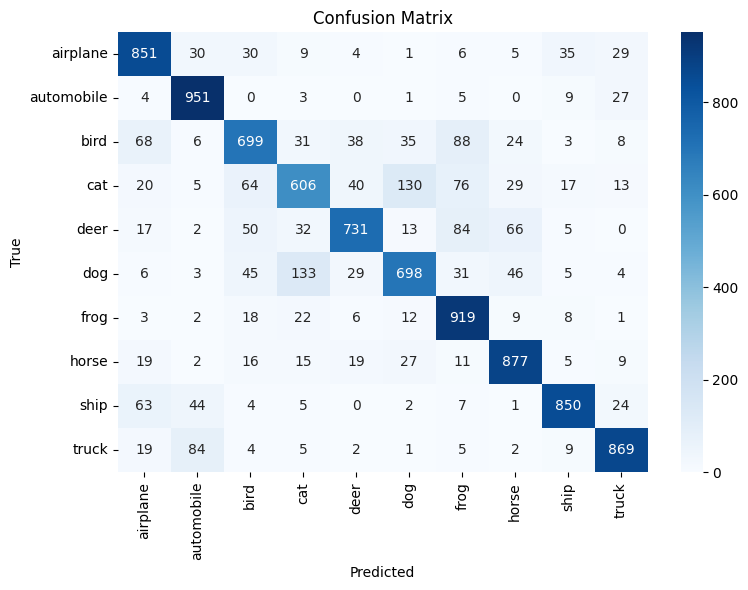

In [ ]:
# 11. Plot Confusion Matrix
def plot_confusion_matrix():
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix()

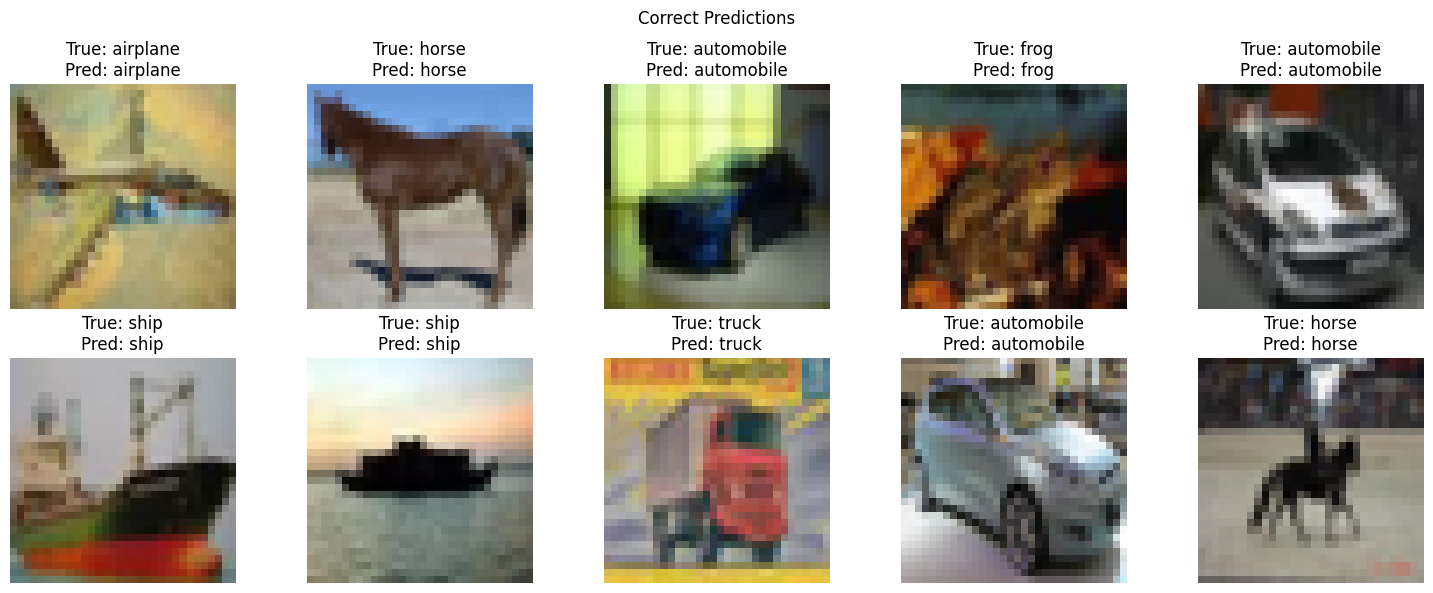

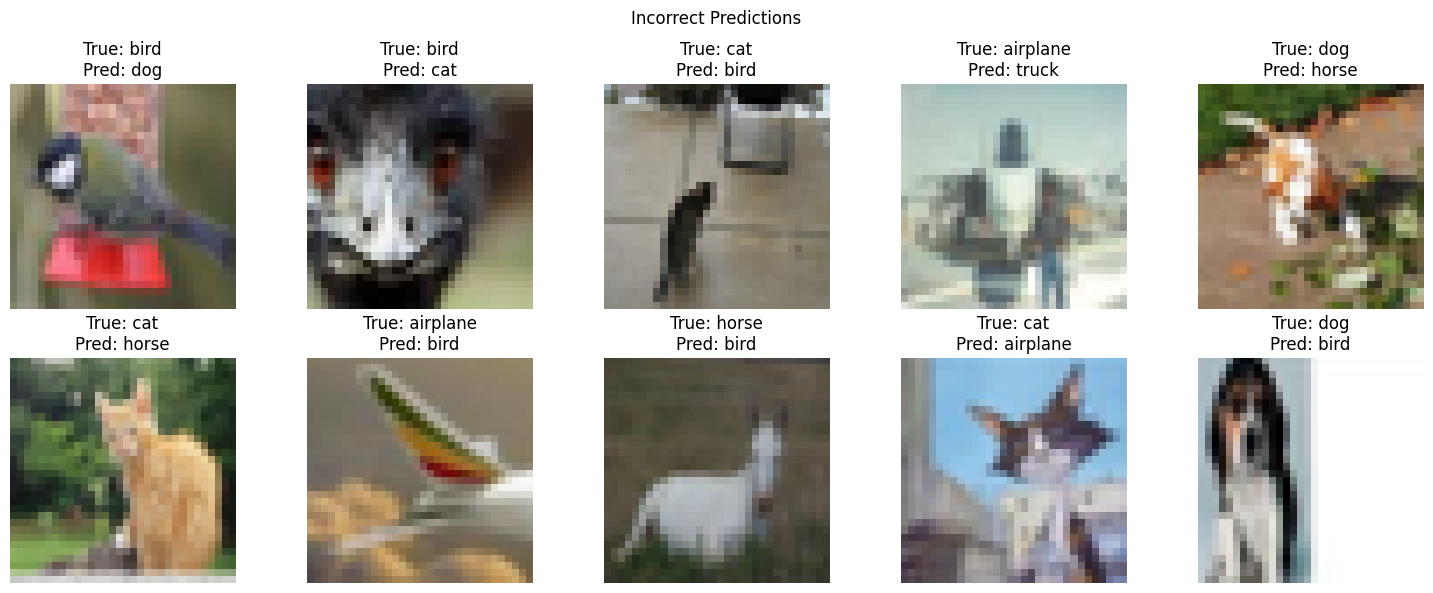

In [ ]:
# 12. Display examples of correct and incorrect predictions
def plot_example_predictions(correct=True):
    if correct:
        indices = np.where(predicted_classes == true_classes)[0]
        title = "Correct Predictions"
    else:
        indices = np.where(predicted_classes != true_classes)[0]
        title = "Incorrect Predictions"

    # Randomly select 10 examples
    selected_indices = np.random.choice(indices, size=min(10, len(indices)), replace=False)

    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(selected_indices):
        plt.subplot(2, 5, i+1)
        plt.imshow(test_images[idx])
        plt.title(f"True: {class_names[true_classes[idx]]}\nPred: {class_names[predicted_classes[idx]]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
plot_example_predictions(correct=True)
plot_example_predictions(correct=False)

In [ ]:
# 13. Save the model
model.save('cifar10_cnn_model.h5')
print("\nModel saved as 'cifar10_cnn_model.h5'")


Model saved as 'cifar10_cnn_model.h5'


In [ ]:
# 14. Function to predict single images (for future use)
def predict_image(image_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(32, 32)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])

    print(f"This image is classified as: {class_names[predicted_class]}")
    print(f"Confidence: {confidence:.4f}")

    # Show the image
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()

    return class_names[predicted_class], confidence

print("\nCNN Image Classification pipeline completed successfully!")


CNN Image Classification pipeline completed successfully!
